In [1]:
import requests
from pathlib import Path
import pandas as pd
import json
import geopandas as gpd


# Download Asylum Descision Dataset from UNHRC

We request 15 years of data from 2008-2023

In [2]:
# UNHCR base url for asylum seeker decisions of countries

url = "https://api.unhcr.org/population/v1/asylum-decisions/"


In [3]:
query_params = {
    "limit": 1000000,
    "yearFrom": 2008,
    "yearTo": 2023,
    "coo_all":  'TRUE',
    "coa_all":  'TRUE',
}

response = requests.get(url=url, params=query_params)

In [5]:
data = response.json()['items']


In [6]:

dataset_2008_2023 = [
    {'year': d['year'],
    'coo_name': d['coo_name'],
    'coo_iso': d['coo_iso'],
    'coa_name': d['coa_name'],
    'coa_iso': d['coa_iso'],
    'dec_recognized': d['dec_recognized'],
    'dec_other': d['dec_other'],
    'dec_rejected': d['dec_rejected'],
    'dec_closed': d['dec_closed'],
    'dec_total': d['dec_total'],
    } for d in data]

In [9]:
df_asylum_decisions = pd.DataFrame(dataset_2008_2023)
df_asylum_decisions.head()

,year,coo_name,coo_iso,coa_name,coa_iso,dec_recognized,dec_other,dec_rejected,dec_closed,dec_total
0,2008,Afghanistan,AFG,Australia,AUS,5,0,0,0,5
1,2008,Albania,ALB,Australia,AUS,5,0,5,0,10
2,2008,Egypt,EGY,Australia,AUS,10,0,17,0,27
3,2008,Bahrain,BHR,Australia,AUS,0,0,5,0,5
4,2008,Bangladesh,BGD,Australia,AUS,11,0,59,87,157


In [12]:
columnsForEdit = ['year', 'dec_recognized', 'dec_other', 'dec_rejected', 'dec_closed', 'dec_total']
df_asylum_decisions[columnsForEdit] = df_asylum_decisions[columnsForEdit].astype(int)
df_asylum_decisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73296 entries, 0 to 73295
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            73296 non-null  int64 
 1   coo_name        73296 non-null  object
 2   coo_iso         73296 non-null  object
 3   coa_name        73296 non-null  object
 4   coa_iso         73296 non-null  object
 5   dec_recognized  73296 non-null  int64 
 6   dec_other       73296 non-null  int64 
 7   dec_rejected    73296 non-null  int64 
 8   dec_closed      73296 non-null  int64 
 9   dec_total       73296 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 5.6+ MB


In [13]:
# Save data to json format
data_path = Path.cwd() / "data" / "asylum_decisions_2008-2023.json"
df_asylum_decisions.to_json(data_path, orient='records', indent=4)


# View Country Border GeoJSON Dataset

Downloaded from [https://github.com/datasets/geo-countries](https://github.com/datasets/geo-countries) which is a GeoJSON converted dataset sourced from [Natural Earth](https://www.naturalearthdata.com/).

In [2]:
country_file = data_path = Path.cwd() / "data" / "countries.geojson"
countries = gpd.read_file(country_file)


In [3]:
countries

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."
...,...,...,...,...
250,Samoa,WSM,WS,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8..."


<Axes: >

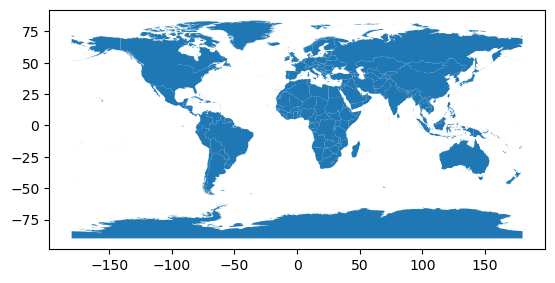

In [4]:
countries.plot()